# Speculation
* which keywords are high efficient amongst keywords used in advertisement campain? 
* which groups are high efficient amongst advertisement groups? 

# Used modules
Pandas, matplotlip, seaborn, wordcloud

# Conclusion

the most efficient advertisement keywards are as below:<br>
휠타이어, 스플릿, 프리워시, 마프라, 스티커제거방법

the most efficient advertisement groups are as below:<br>
'0. 자사명 [ 마프라 ]', '00. 브랜드키워드_상품명', '01. 상품별효율키워드', '스티커제거제',
       '타이어세정광택제']
       


In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS


%matplotlib inline

# korean font settings
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)
sns.set_style('whitegrid')

# display settings

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# data settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
df_data1 = pd.read_csv('data/advertisement_data_1-3.csv', skiprows=[0], encoding="utf-8-sig")
df_data2 = pd.read_csv('data/advertisement_data_4-6.csv', skiprows=[0], encoding="utf-8-sig")
df_data3 = pd.read_csv('data/advertisement_data_7-12.csv', skiprows=[0], encoding="utf-8-sig")

In [3]:
df = pd.concat([df_data1, df_data2, df_data3])

# Data preprocessing for advertisement keywords

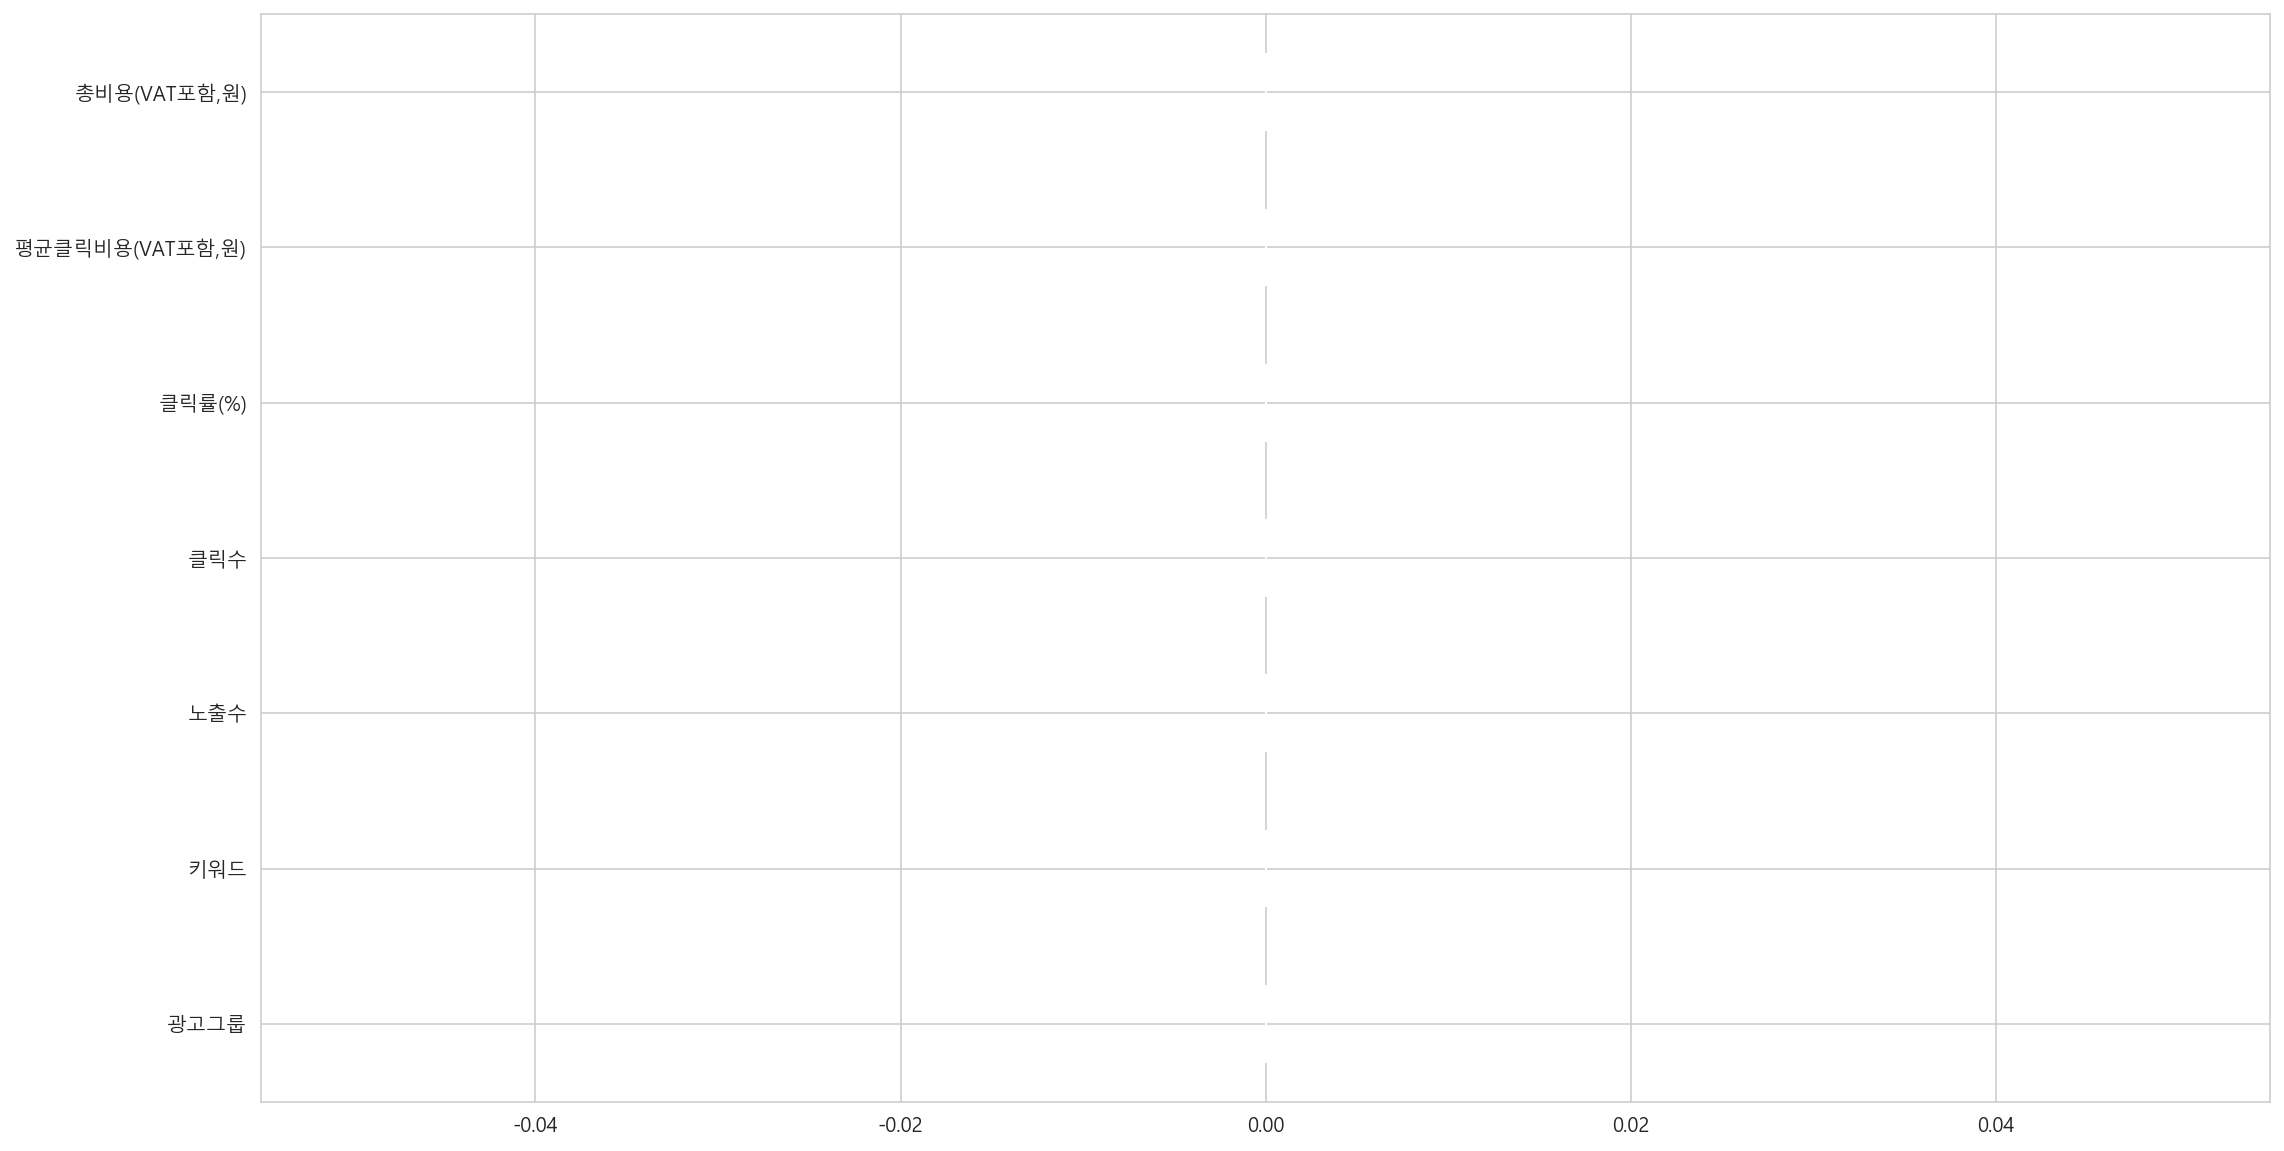

In [4]:
# check missing data
plt.rc('font', family='Malgun Gothic')
df.isnull().sum().plot.barh(figsize=(18,10))

In [5]:
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,0. 자사명 [ 마프라 ],마프라,"9,402",65,0.70,294,"19,096"
1,0. 자사명 [ 마프라 ],마프라몰,738,29,3.93,77,"2,233"
2,0. 자사명 [ 마프라 ],물왁스,"8,069",2,0.03,325,649
3,0. 자사명 [ 마프라 ],발수코팅,2,0,0.00,0,0
4,0. 자사명 [ 마프라 ],버그클리너,771,0,0.00,0,0


In [6]:
df['노출수(filtered)'] = df['노출수'].str.replace(',', '').astype(int)
df['클릭수(filtered)'] = df['클릭수'].str.replace(',', '').astype(int)
df['총비용(VAT포함,원, filtered)'] = df['총비용(VAT포함,원)'].str.replace(',', '').astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665 entries, 0 to 424
Data columns (total 10 columns):
광고그룹                      665 non-null object
키워드                       665 non-null object
노출수                       665 non-null object
클릭수                       665 non-null object
클릭률(%)                    665 non-null float64
평균클릭비용(VAT포함,원)           665 non-null object
총비용(VAT포함,원)              665 non-null object
노출수(filtered)             665 non-null int32
클릭수(filtered)             665 non-null int32
총비용(VAT포함,원, filtered)    665 non-null int32
dtypes: float64(1), int32(3), object(6)
memory usage: 49.4+ KB


# Visualisation of efficient advertisement keywoards

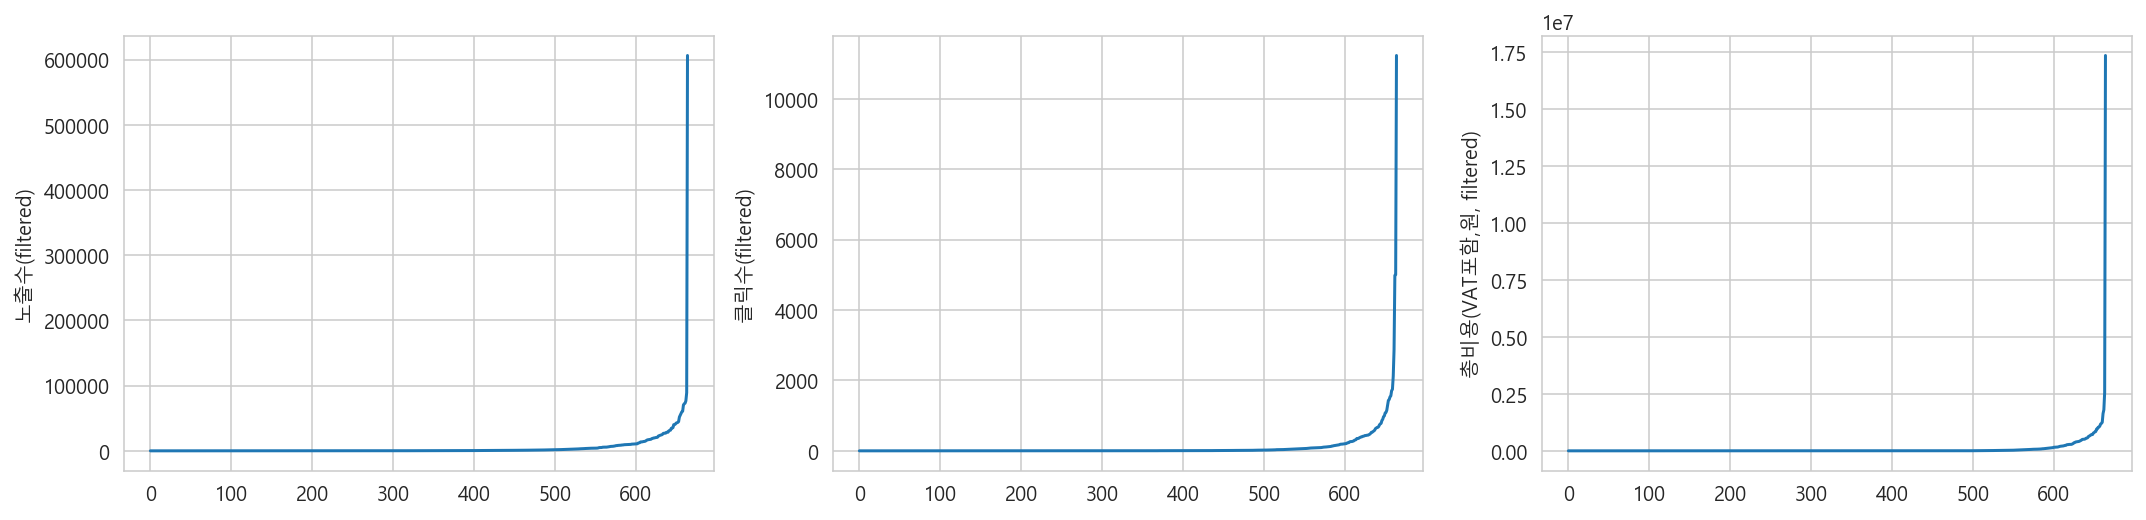

In [8]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18, 4)


df_ep = df['노출수(filtered)'].sort_values(ascending=True).reset_index().drop('index', axis=1)
sns.lineplot(data=df_ep, x=df_ep.index, y="노출수(filtered)", ax=ax1)

df_cn = df['클릭수(filtered)'].sort_values(ascending=True).reset_index().drop('index', axis=1)
sns.lineplot(data=df_cn, x=df_cn.index, y="클릭수(filtered)", ax=ax2)

df_tc = df['총비용(VAT포함,원, filtered)'].sort_values(ascending=True).reset_index().drop('index', axis=1)
sns.lineplot(data=df_tc, x=df_tc.index, y="총비용(VAT포함,원, filtered)", ax=ax3)

## Efficient advertisement keywords matching to 95% or above impressions

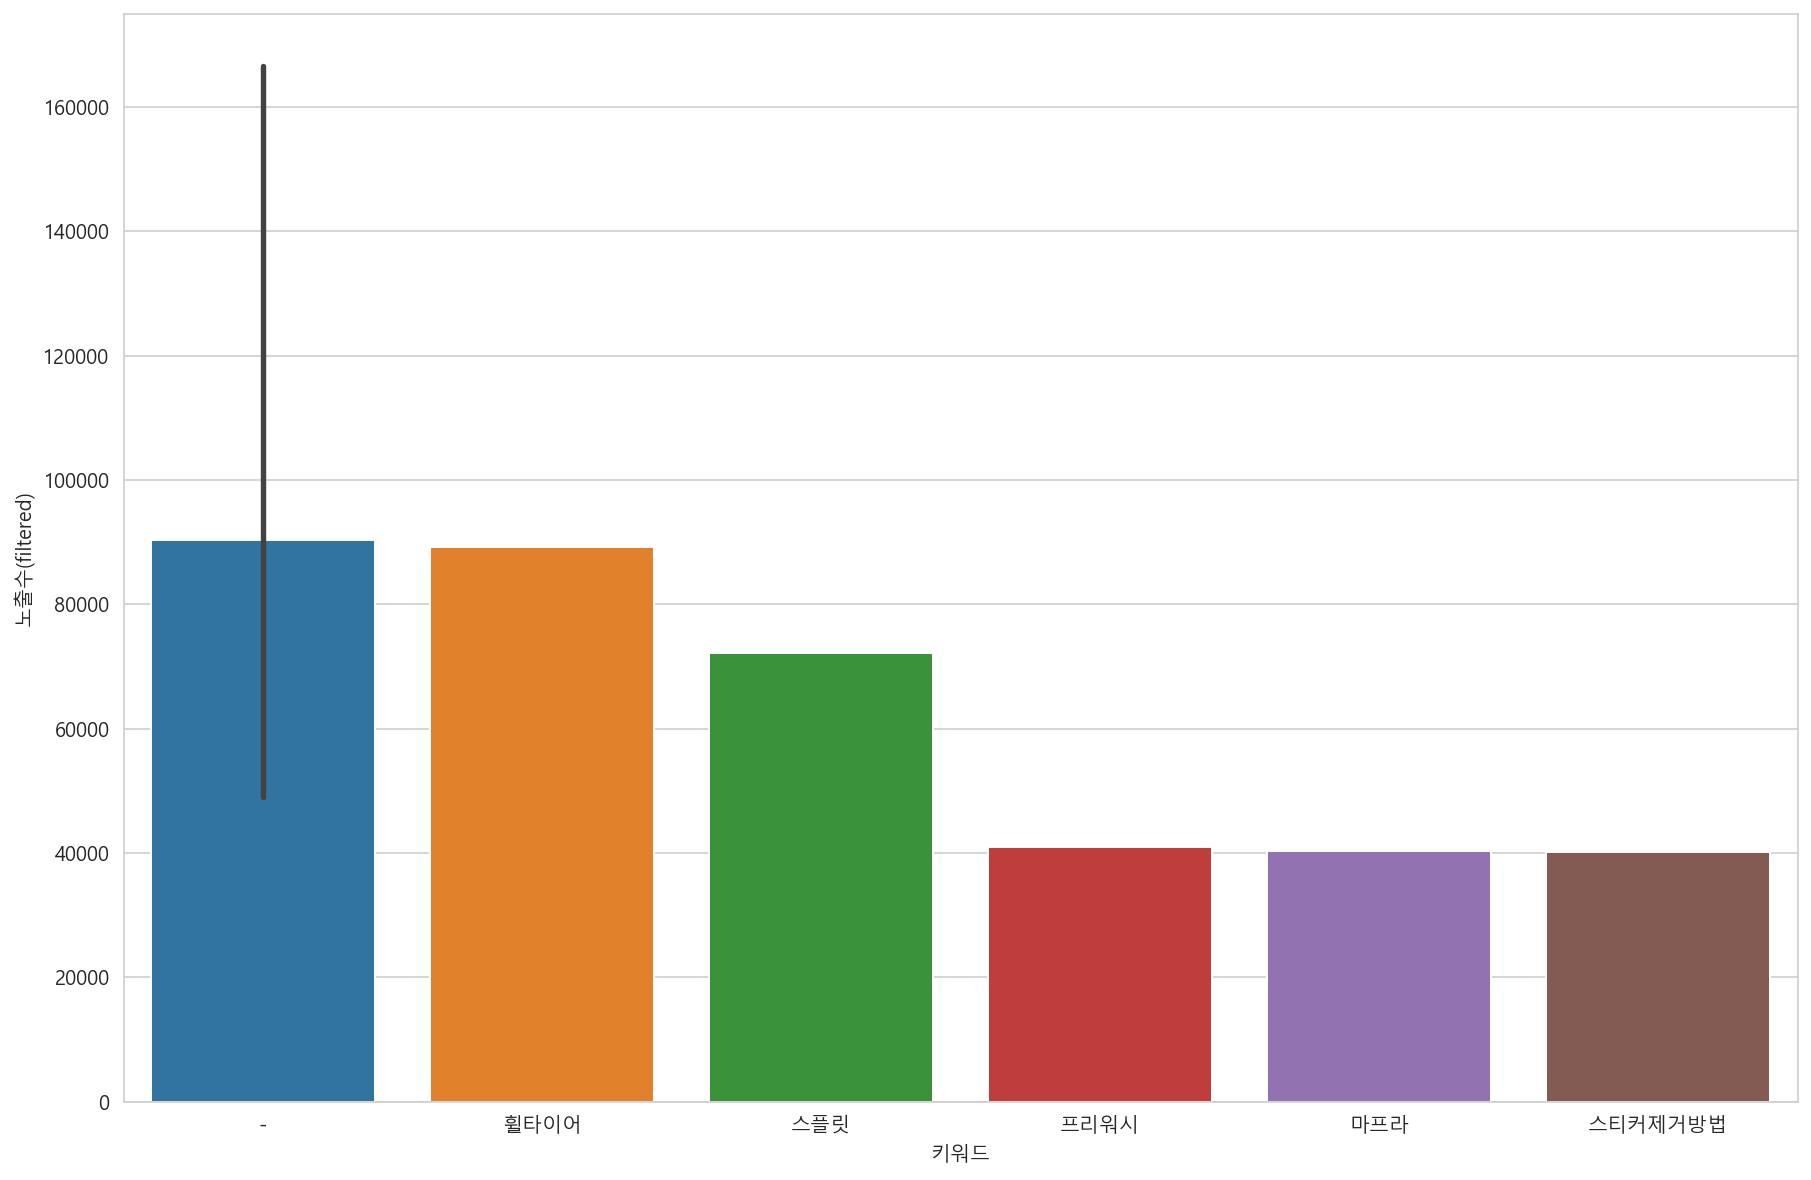

In [10]:
plt.rc('font', family='Malgun Gothic')
df_imp_kw = df.loc[df["노출수(filtered)"] >= df["노출수(filtered)"].quantile(0.95),["키워드","노출수(filtered)"]]

df_imp_kw_sort = df_imp_kw.sort_values(by="노출수(filtered)", ascending=False ).head(20)
plt.figure(figsize=(15,10))
sns.barplot(data=df_imp_kw_sort, x="키워드", y="노출수(filtered)")

In [25]:
df_imp_kw_sort

,키워드,노출수(filtered)
381,-,606355
251,휠타이어,89160
372,-,76708
327,-,73033
125,스플릿,72167
384,-,70428
46,-,60701
44,-,59858
48,-,57218
51,-,54498


## Efficient advertisement keywords matching to 95% or above clicks

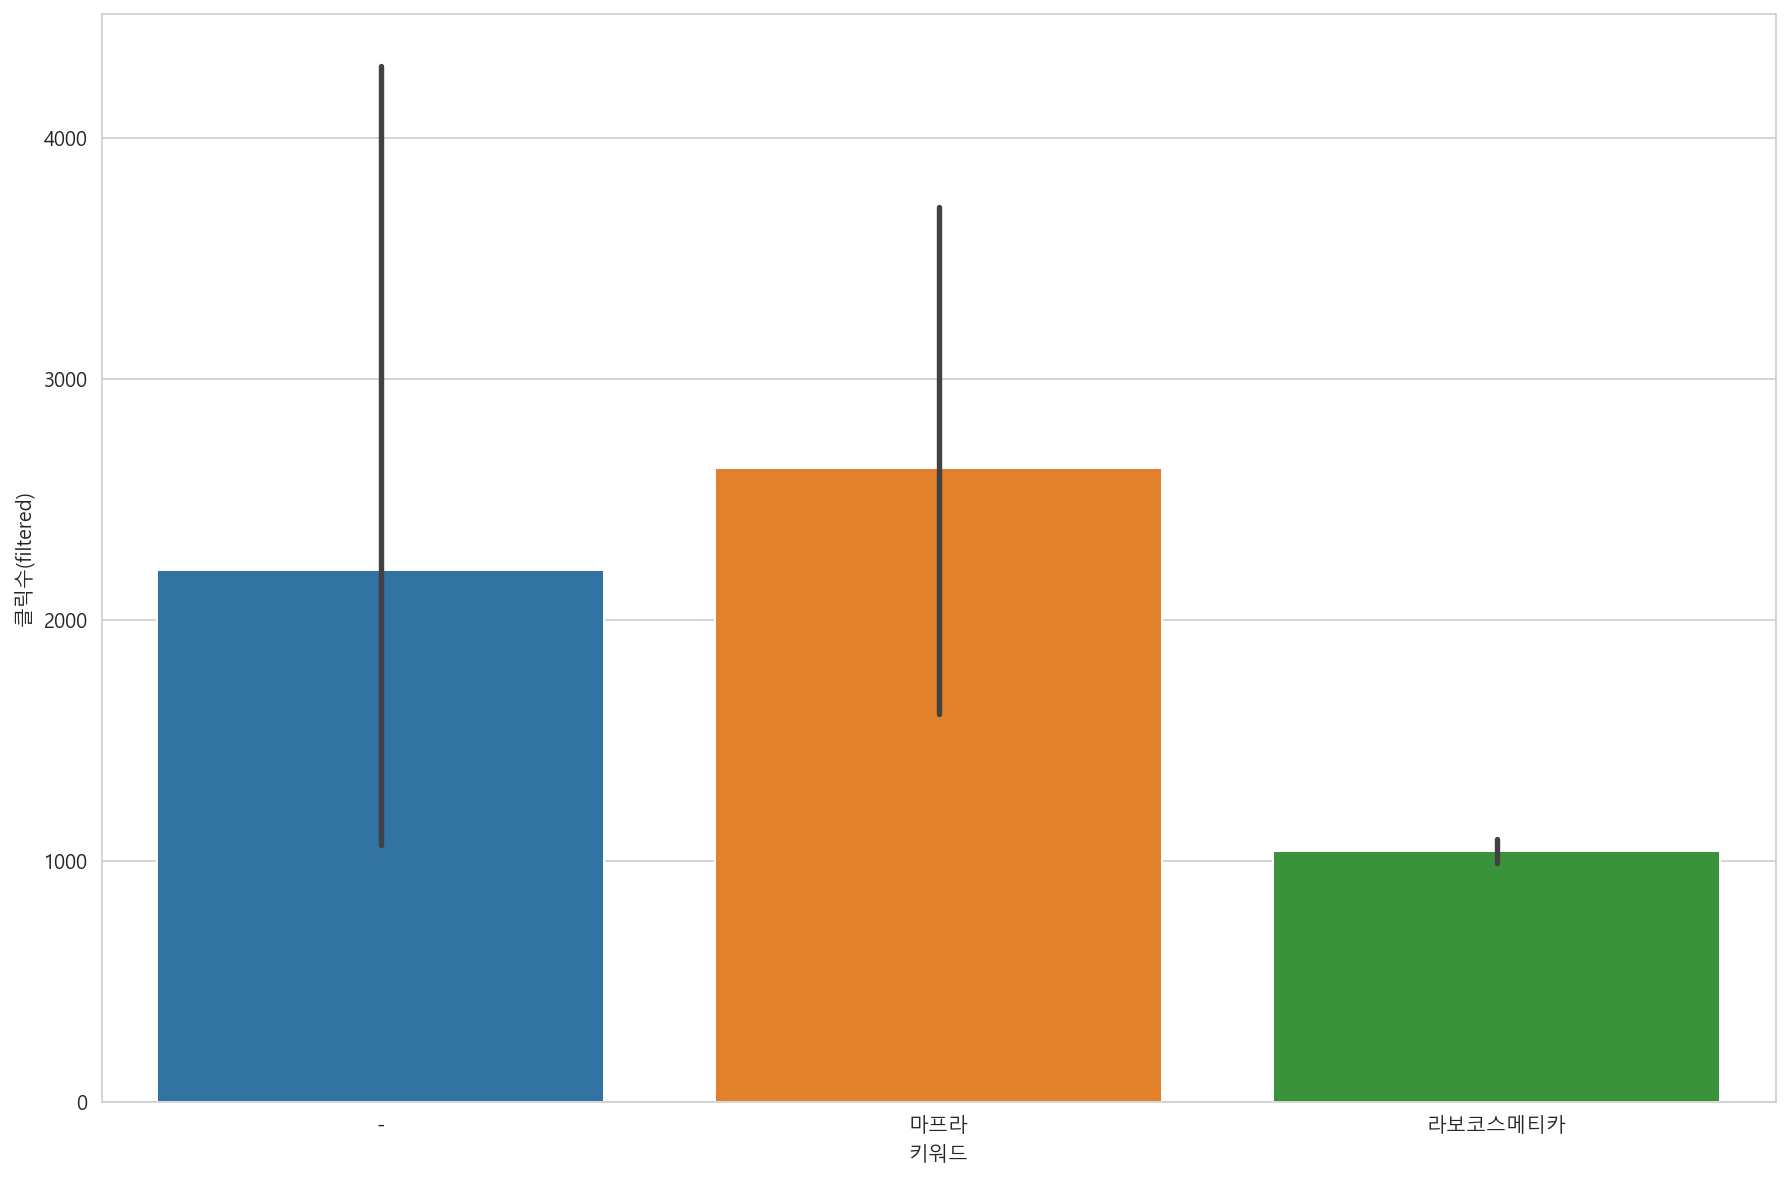

In [11]:
df_cp_kw = df.loc[df["클릭수(filtered)"] >= df["클릭수(filtered)"].quantile(0.95),["키워드","클릭수(filtered)"]]
df_cp_kw_sort = df_cp_kw.sort_values(by="클릭수(filtered)", ascending=False ).head(20)
plt.figure(figsize=(15,10))
sns.barplot(data=df_cp_kw_sort, x="키워드", y="클릭수(filtered)")

In [26]:
df_cp_kw_sort

,키워드,클릭수(filtered)
381,-,11234
115,마프라,5007
400,마프라,4985
324,-,2874
106,마프라,2121
386,마프라,1748
46,-,1710
109,마프라,1561
44,마프라,1533
0,마프라,1458


## Efficient advertisement keywords matching to 95% or above impressions & clicks

In [38]:
df_imcp_kw = df.loc[(df["노출수(filtered)"] >= df["노출수(filtered)"].quantile(0.95)) & 
                    (df["클릭수(filtered)"] >= df["클릭수(filtered)"].quantile(0.95)),
                    ["키워드", "노출수(filtered)","클릭수(filtered)"]]
df_imcp_kw[["키워드", "노출수(filtered)", "클릭수(filtered)"]]


# wc = WordCloud(stopwords = STOPWORDS,font_path='font/malgun.ttf',
#               background_color="white", width=800, height=600).generate(' '.join(df_imcp_kw["키워드"]))

# plt.figure(figsize=(15,10))
# plt.imshow(wc)
# plt.axis("off")
# plt.show()

,키워드,노출수(filtered),클릭수(filtered)
0,마프라,40275,1458
41,-,24217,1300
42,-,34895,1077
44,-,59858,667
45,-,44771,741
46,-,60701,1710
48,-,57218,1152
51,-,54498,566
85,-,31675,631
44,마프라,26946,1533


## Low efficient advertisement keywords
* impressions below 95%
* clicks less than 95%
* total costs between 85% and 95%

In [42]:
df_no_imcp_kw = df.loc[
                    (df["노출수(filtered)"] < df["노출수(filtered)"].quantile(0.95)) & 
                    (df["클릭수(filtered)"] < df["클릭수(filtered)"].quantile(0.95)) & 
                    (df["총비용(VAT포함,원, filtered)"] >= df["총비용(VAT포함,원, filtered)"].quantile(0.85)) & 
                    (df["총비용(VAT포함,원, filtered)"] < df["총비용(VAT포함,원, filtered)"].quantile(0.95)),
                    ["키워드", "노출수(filtered)","클릭수(filtered)", "총비용(VAT포함,원, filtered)"]
                    ]
df_no_imcp_kw[["키워드", "노출수(filtered)", "클릭수(filtered)", "총비용(VAT포함,원, filtered)"]]



# wc = WordCloud(stopwords = STOPWORDS,font_path='data/malgun.ttf',
#               background_color="white", width=800, height=600).generate(' '.join(df_no_imcp_kw["키워드"]))

# plt.figure(figsize=(15,10))
# plt.imshow(wc)
# plt.axis("off")
# plt.show()

,키워드,노출수(filtered),클릭수(filtered),"총비용(VAT포함,원, filtered)"
41,-,5652,63,91476
43,-,3700,64,111617
51,-,6995,265,284944
52,-,17106,110,130427
53,-,15687,231,353661
56,-,9582,188,272404
59,-,19776,166,198935
61,-,5688,135,191334
62,-,4097,191,281908
63,-,2563,98,163823


# Data preprocessing for advertisement groups

In [14]:
dfg = df.groupby("광고그룹").sum()

In [15]:
dfg.head()

,클릭률(%),노출수(filtered),클릭수(filtered),"총비용(VAT포함,원, filtered)"
광고그룹,,,,
#. 세차용품,21.79,1377,26,5500
#. 세차타올,11.17,179,3,231
#. 송진제거,7.89,5669,28,5049
0. 라보코스메티카,191.95,155224,1233,375397
0. 자사명 [ 마프라 ],303.87,389686,4099,1945757


In [16]:
dfg["클릭률(%,filtered)"] = dfg["클릭수(filtered)"] / dfg["노출수(filtered)"]
dfg["평균클릭비용(VAT포함,원,filtered)"] = dfg["총비용(VAT포함,원, filtered)"] / dfg["클릭수(filtered)"]

In [17]:
dfg[dfg["클릭수(filtered)"] == 0]

,클릭률(%),노출수(filtered),클릭수(filtered),"총비용(VAT포함,원, filtered)","클릭률(%,filtered)","평균클릭비용(VAT포함,원,filtered)"
광고그룹,,,,,,
05. 엔진룸세척,0.0,1,0,0,0.0,NaN
07. 휠세정광택제,0.0,403,0,0,0.0,NaN
08. 유리코팅제,0.0,31,0,0,0.0,NaN
손소독제,0.0,290,0,0,0.0,NaN
안전장갑,0.0,34,0,0,0.0,NaN


In [18]:
dfg["평균클릭비용(VAT포함,원,filtered)"] = dfg["평균클릭비용(VAT포함,원,filtered)"].fillna(0)
dfg["평균클릭비용(VAT포함,원,filtered)"] = round(dfg["평균클릭비용(VAT포함,원,filtered)"],0).astype(int)

In [19]:
dfg.head()

,클릭률(%),노출수(filtered),클릭수(filtered),"총비용(VAT포함,원, filtered)","클릭률(%,filtered)","평균클릭비용(VAT포함,원,filtered)"
광고그룹,,,,,,
#. 세차용품,21.79,1377,26,5500,0.018882,212
#. 세차타올,11.17,179,3,231,0.016760,77
#. 송진제거,7.89,5669,28,5049,0.004939,180
0. 라보코스메티카,191.95,155224,1233,375397,0.007943,304
0. 자사명 [ 마프라 ],303.87,389686,4099,1945757,0.010519,475


# Visualisation of efficient advertisement groups 

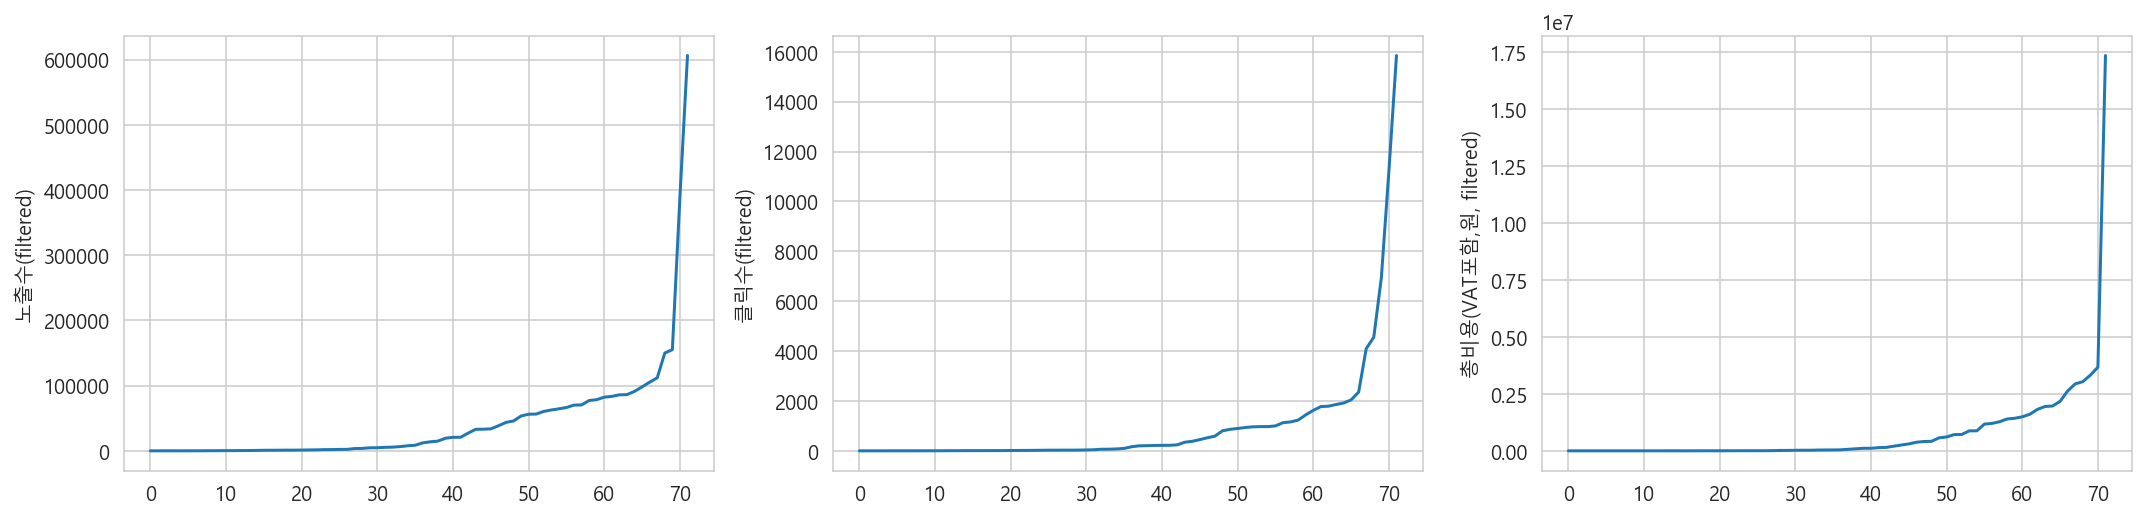

In [20]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18, 4)


df_ep = dfg["노출수(filtered)"].sort_values().reset_index().drop("광고그룹", axis=1)
sns.lineplot(data=df_ep, x=df_ep.index, y="노출수(filtered)", ax=ax1)

df_cn = dfg["클릭수(filtered)"].sort_values().reset_index().drop("광고그룹", axis=1)
sns.lineplot(data=df_cn, x=df_cn.index, y="클릭수(filtered)", ax=ax2)

df_tc = dfg["총비용(VAT포함,원, filtered)"].sort_values().reset_index().drop("광고그룹", axis=1)
sns.lineplot(data=df_tc, x=df_tc.index, y="총비용(VAT포함,원, filtered)", ax=ax3)

## High efficient ad groups
* 90% or above impressions
* 90% or above clicks

In [44]:
result = dfg[(dfg["노출수(filtered)"] >= dfg["노출수(filtered)"].quantile(0.9)) & (dfg["클릭수(filtered)"] >= dfg["클릭수(filtered)"].quantile(0.9))]
result.index

Index(['0. 자사명 [ 마프라 ]', '01. 상품별효율키워드', '스티커제거제'], dtype='object', name='광고그룹')

## Low efficient ad groups
* impressions below 90%
* clicks less than 90%
* total costs between 60% and 90%

In [45]:
cost = dfg[
        (dfg["노출수(filtered)"] < dfg["노출수(filtered)"].quantile(0.9)) &
        (dfg["클릭수(filtered)"] < dfg["클릭수(filtered)"].quantile(0.9)) &
        (dfg["총비용(VAT포함,원, filtered)"] >= dfg["총비용(VAT포함,원, filtered)"].quantile(0.6)) &
        (dfg["총비용(VAT포함,원, filtered)"] < dfg["총비용(VAT포함,원, filtered)"].quantile(0.9))   
          ]
cost.index

Index(['00. 브랜드키워드_마프라', '00. 상위(상시체크)', '02. 광택코팅제', '02. 마프라 기존키워드',
       '03. 가죽클리너', '03. 라보코스 기존키워드', '04. 세차패키지', '07. 카샴푸', '08. 휠세정광택제',
       '11. 차량용방향제', '12. 유리세정제', '광택코팅제', '방수스프레이', '세차패키지', '유리세정제', '유리코팅제',
       '휠세정광택제'],
      dtype='object', name='광고그룹')